## 🧠 1. Setup: Imports

In [1]:
# Core libraries
import pandas as pd
import numpy as np

In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [3]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

In [5]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [6]:
# LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [7]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

## 📁 2. Load and Preprocess Data

In [8]:
# Load data
df = pd.read_csv("AAPL.csv")  # Replace with your file
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1987-03-19 14:58:06.746088,149.934229,151.478597,149.739449,150.496714,150.496714,30378404
1,1987-03-20 14:58:06.746088,150.631942,151.012979,149.338247,150.358450,150.358450,28476865
2,1987-03-23 14:58:06.746088,150.208367,151.613850,149.050986,151.006138,151.006138,88459530
3,1987-03-24 14:58:06.746088,152.625038,153.170582,150.857986,152.529168,152.529168,60323936
4,1987-03-25 14:58:06.746088,152.462932,153.669319,151.371129,152.295015,152.295015,47425032
...,...,...,...,...,...,...,...
9995,2025-07-10 14:58:06.746088,129.331385,131.728081,129.133742,130.203674,130.203674,88673543
9996,2025-07-11 14:58:06.746088,127.783865,129.980196,126.815944,128.205329,128.205329,99481551
9997,2025-07-14 14:58:06.746088,128.278645,128.323598,125.992454,127.500012,127.500012,51983311
9998,2025-07-15 14:58:06.746088,127.469096,129.626517,126.528023,127.995778,127.995778,53592344


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      1987-03-19 14:58:06.746088
1      1987-03-20 14:58:06.746088
2      1987-03-23 14:58:06.746088
3      1987-03-24 14:58:06.746088
4      1987-03-25 14:58:06.746088
                  ...            
9995   2025-07-10 14:58:06.746088
9996   2025-07-11 14:58:06.746088
9997   2025-07-14 14:58:06.746088
9998   2025-07-15 14:58:06.746088
9999   2025-07-16 14:58:06.746088
Name: Date, Length: 10000, dtype: datetime64[ns]

In [10]:
df.set_index('Date', inplace=True)

In [11]:
df = df[['Close']]  # Focus on 'Close' price
df

,Close
Date,
1987-03-19 14:58:06.746088,150.496714
1987-03-20 14:58:06.746088,150.358450
1987-03-23 14:58:06.746088,151.006138
1987-03-24 14:58:06.746088,152.529168
1987-03-25 14:58:06.746088,152.295015
...,...
2025-07-10 14:58:06.746088,130.203674
2025-07-11 14:58:06.746088,128.205329
2025-07-14 14:58:06.746088,127.500012


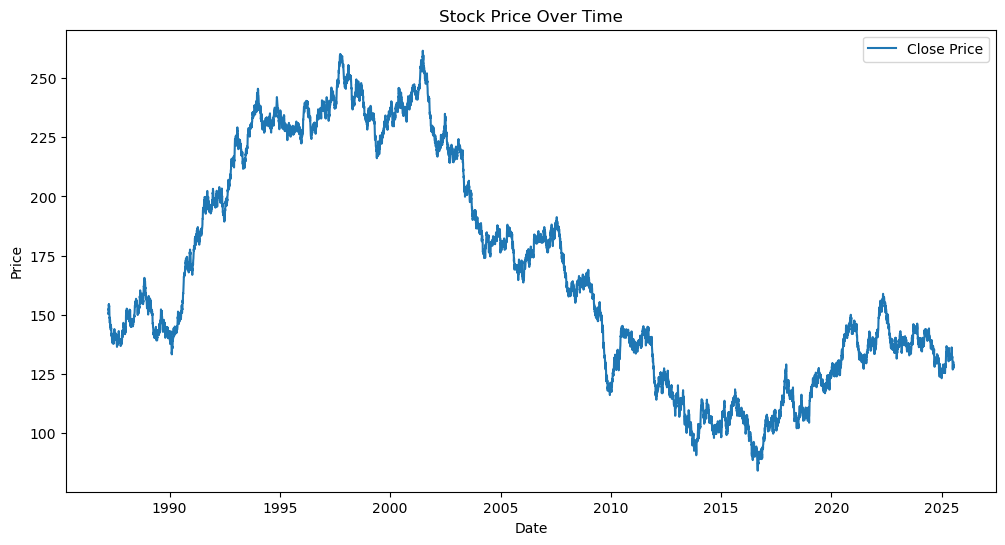

In [12]:
# Visualization
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.title("Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## 📊 3. ARIMA Forecasting

In [13]:
# Set daily frequency
df = df.asfreq('D')

In [14]:
model_arima = ARIMA(df['Close'], order=(5,1,0))
model_arima

In [15]:
result_arima = model_arima.fit()
result_arima

In [16]:
forecast_arima = result_arima.forecast(steps=30)
forecast_arima

2025-07-17 14:58:06.746088    128.507845
2025-07-18 14:58:06.746088    128.485214
2025-07-19 14:58:06.746088    128.529027
2025-07-20 14:58:06.746088    128.519843
2025-07-21 14:58:06.746088    128.513598
2025-07-22 14:58:06.746088    128.517352
2025-07-23 14:58:06.746088    128.517250
2025-07-24 14:58:06.746088    128.516502
2025-07-25 14:58:06.746088    128.516773
2025-07-26 14:58:06.746088    128.516832
2025-07-27 14:58:06.746088    128.516757
2025-07-28 14:58:06.746088    128.516771
2025-07-29 14:58:06.746088    128.516782
2025-07-30 14:58:06.746088    128.516775
2025-07-31 14:58:06.746088    128.516775
2025-08-01 14:58:06.746088    128.516776
2025-08-02 14:58:06.746088    128.516776
2025-08-03 14:58:06.746088    128.516776
2025-08-04 14:58:06.746088    128.516776
2025-08-05 14:58:06.746088    128.516776
2025-08-06 14:58:06.746088    128.516776
2025-08-07 14:58:06.746088    128.516776
2025-08-08 14:58:06.746088    128.516776
2025-08-09 14:58:06.746088    128.516776
2025-08-10 14:58

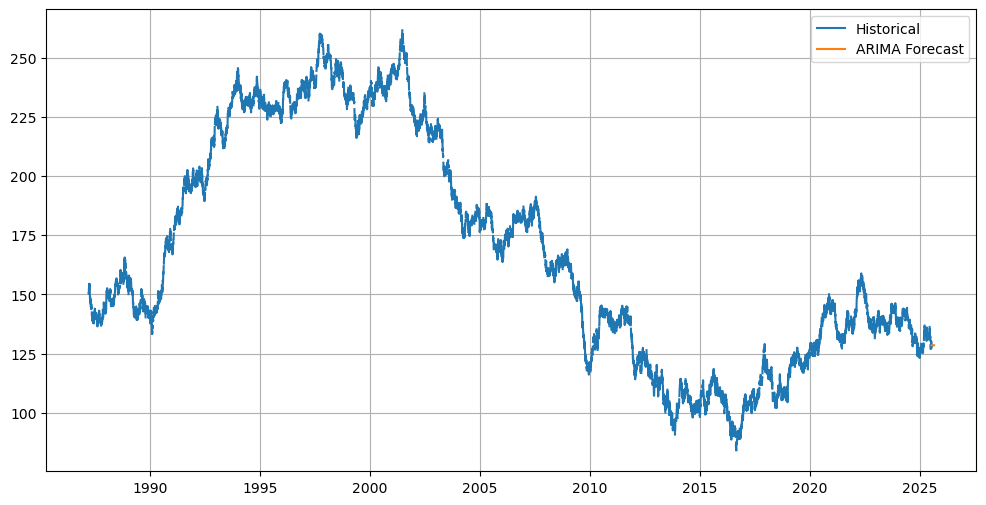

In [17]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Historical')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='B'), forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

## 🌀 4. SARIMA Forecasting

In [18]:
sarima_model = SARIMAX(df['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_model

In [19]:
sarima_result = sarima_model.fit()
sarima_result

In [20]:
forecast_sarima = sarima_result.forecast(steps=30)
forecast_sarima

2025-07-17 14:58:06.746088    128.537445
2025-07-18 14:58:06.746088    128.557742
2025-07-19 14:58:06.746088    128.545866
2025-07-20 14:58:06.746088    128.553436
2025-07-21 14:58:06.746088    128.510459
2025-07-22 14:58:06.746088    128.519481
2025-07-23 14:58:06.746088    128.593666
2025-07-24 14:58:06.746088    128.499283
2025-07-25 14:58:06.746088    128.452206
2025-07-26 14:58:06.746088    128.503919
2025-07-27 14:58:06.746088    128.529514
2025-07-28 14:58:06.746088    128.486446
2025-07-29 14:58:06.746088    128.471273
2025-07-30 14:58:06.746088    128.517556
2025-07-31 14:58:06.746088    128.516311
2025-08-01 14:58:06.746088    128.505172
2025-08-02 14:58:06.746088    128.479451
2025-08-03 14:58:06.746088    128.506131
2025-08-04 14:58:06.746088    128.552234
2025-08-05 14:58:06.746088    128.456530
2025-08-06 14:58:06.746088    128.406690
2025-08-07 14:58:06.746088    128.454150
2025-08-08 14:58:06.746088    128.486123
2025-08-09 14:58:06.746088    128.452381
2025-08-10 14:58

In [21]:
sarima_model = SARIMAX(df['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
forecast_sarima = sarima_result.forecast(steps=30)

## 🔮 5. Prophet Forecasting

In [22]:
df_prophet = df.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
df_prophet

,ds,y
0,1987-03-19 14:58:06.746088,150.496714
1,1987-03-20 14:58:06.746088,150.358450
2,1987-03-21 14:58:06.746088,NaN
3,1987-03-22 14:58:06.746088,NaN
4,1987-03-23 14:58:06.746088,151.006138
...,...,...
13995,2025-07-12 14:58:06.746088,NaN
13996,2025-07-13 14:58:06.746088,NaN
13997,2025-07-14 14:58:06.746088,127.500012
13998,2025-07-15 14:58:06.746088,127.995778


In [23]:
prophet_model = Prophet()
prophet_model

In [24]:
prophet_model.fit(df_prophet)

20:33:15 - cmdstanpy - INFO - Chain [1] start processing
20:33:29 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
future = prophet_model.make_future_dataframe(periods=30)
future

,ds
0,1987-03-19 14:58:06.746088
1,1987-03-20 14:58:06.746088
2,1987-03-21 14:58:06.746088
3,1987-03-22 14:58:06.746088
4,1987-03-23 14:58:06.746088
...,...
14025,2025-08-11 14:58:06.746088
14026,2025-08-12 14:58:06.746088
14027,2025-08-13 14:58:06.746088
14028,2025-08-14 14:58:06.746088


In [26]:
forecast_prophet = prophet_model.predict(future)
forecast_prophet

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1987-03-19 14:58:06.746088,141.336255,130.895944,149.396920,141.336255,141.336255,-1.460260,-1.460260,-1.460260,-1.585450,-1.585450,-1.585450,0.125191,0.125191,0.125191,0.0,0.0,0.0,139.875995
1,1987-03-20 14:58:06.746088,141.365402,131.980120,148.899916,141.365402,141.365402,-1.448289,-1.448289,-1.448289,-1.571554,-1.571554,-1.571554,0.123265,0.123265,0.123265,0.0,0.0,0.0,139.917113
2,1987-03-21 14:58:06.746088,141.394550,136.890001,153.863933,141.394550,141.394550,4.095802,4.095802,4.095802,3.971253,3.971253,3.971253,0.124549,0.124549,0.124549,0.0,0.0,0.0,145.490352
3,1987-03-22 14:58:06.746088,141.423697,136.529280,154.063773,141.423697,141.423697,4.099896,4.099896,4.099896,3.971245,3.971245,3.971245,0.128651,0.128651,0.128651,0.0,0.0,0.0,145.523593
4,1987-03-23 14:58:06.746088,141.452845,130.810980,148.585699,141.452845,141.452845,-1.446233,-1.446233,-1.446233,-1.581317,-1.581317,-1.581317,0.135084,0.135084,0.135084,0.0,0.0,0.0,140.006612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14025,2025-08-11 14:58:06.746088,146.703460,136.606328,153.764016,146.703460,146.703460,-1.156914,-1.156914,-1.156914,-1.581317,-1.581317,-1.581317,0.424403,0.424403,0.424403,0.0,0.0,0.0,145.546546
14026,2025-08-12 14:58:06.746088,146.713167,136.309778,154.431954,146.713167,146.713167,-1.186822,-1.186822,-1.186822,-1.614819,-1.614819,-1.614819,0.427997,0.427997,0.427997,0.0,0.0,0.0,145.526345
14027,2025-08-13 14:58:06.746088,146.722873,136.663732,155.108423,146.722873,146.722873,-1.152892,-1.152892,-1.152892,-1.589359,-1.589359,-1.589359,0.436466,0.436466,0.436466,0.0,0.0,0.0,145.569981
14028,2025-08-14 14:58:06.746088,146.732580,135.696499,154.426203,146.732580,146.732580,-1.136036,-1.136036,-1.136036,-1.585450,-1.585450,-1.585450,0.449414,0.449414,0.449414,0.0,0.0,0.0,145.596544


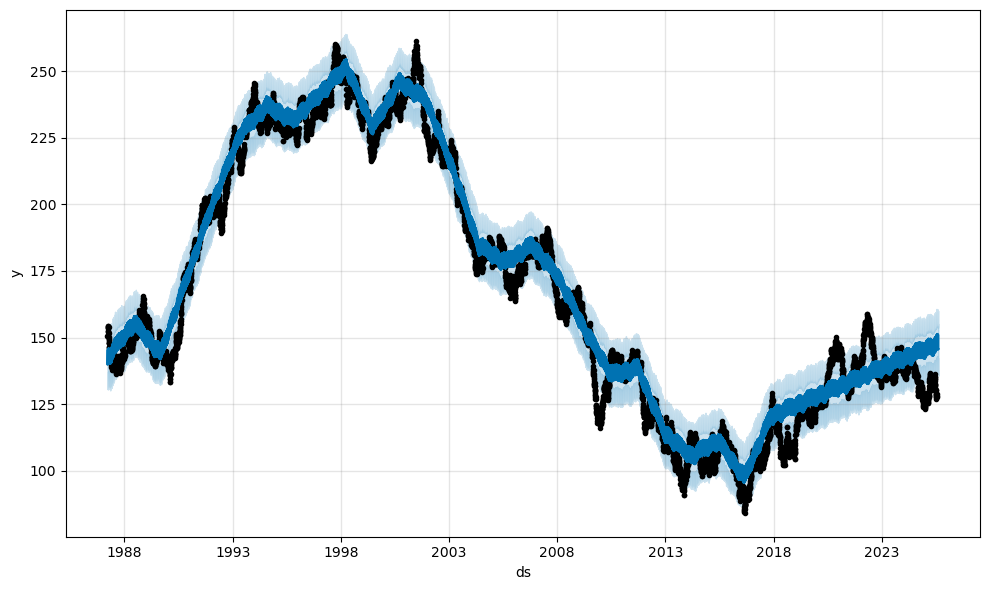

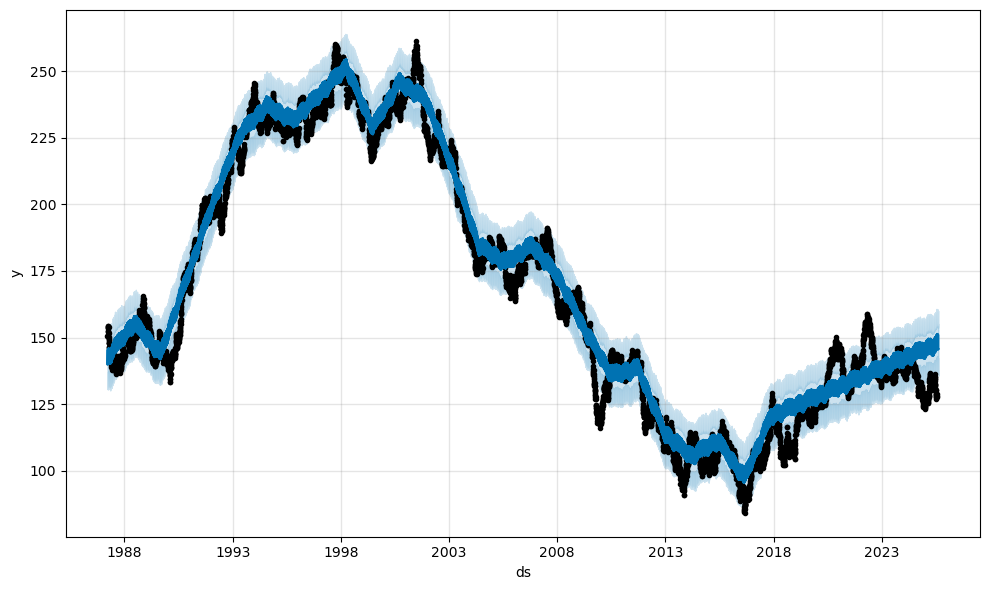

In [27]:
prophet_model.plot(forecast_prophet)

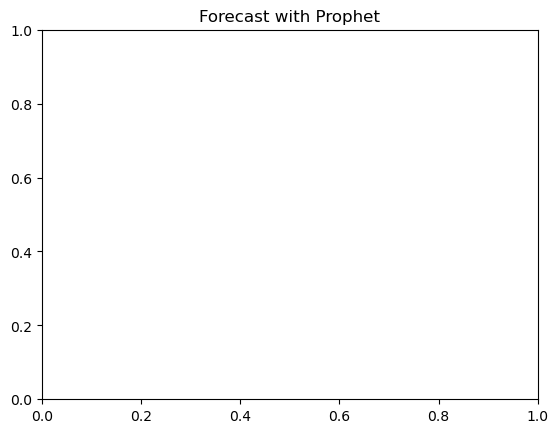

In [28]:
plt.title("Forecast with Prophet")
plt.show()

20:33:35 - cmdstanpy - INFO - Chain [1] start processing
20:33:52 - cmdstanpy - INFO - Chain [1] done processing


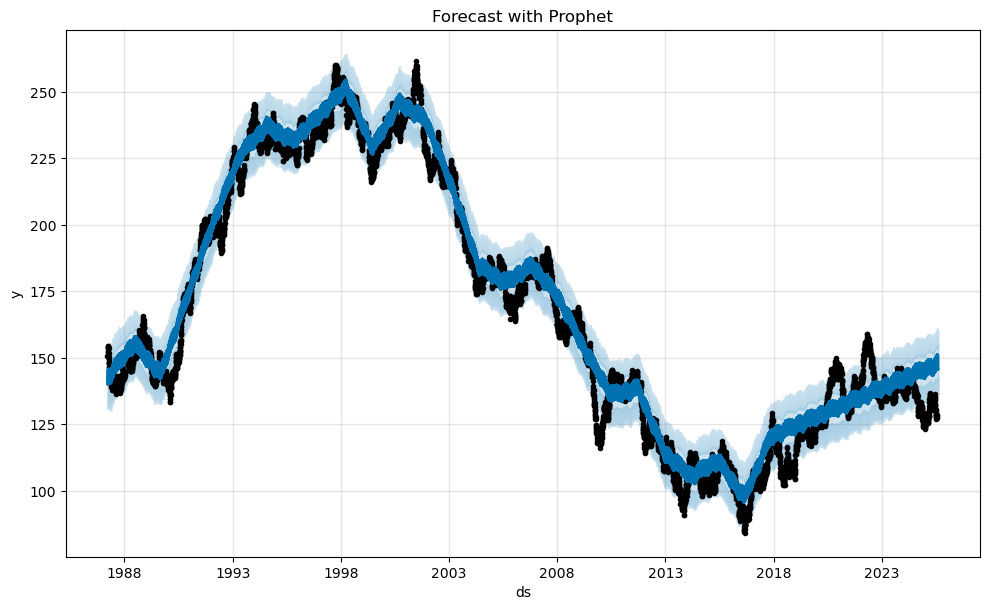

In [29]:
df_prophet = df.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_model = Prophet()
prophet_model.fit(df_prophet)

future = prophet_model.make_future_dataframe(periods=30)
forecast_prophet = prophet_model.predict(future)

prophet_model.plot(forecast_prophet)
plt.title("Forecast with Prophet")
plt.show()

## 🧬 6. LSTM Forecasting

In [30]:
# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [31]:
scaler

MinMaxScaler()

In [32]:
scaled_data

array([[0.373873  ],
       [0.37309352],
       [       nan],
       ...,
       [0.24422739],
       [0.24702231],
       [0.25065509]])

In [33]:
# Sequence creation
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        Y.append(data[i+time_step, 0])
    return np.array(X), np.array(Y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [34]:
X

array([[[0.373873  ],
        [0.37309352],
        [       nan],
        ...,
        [0.32689874],
        [       nan],
        [       nan]],

       [[0.37309352],
        [       nan],
        [       nan],
        ...,
        [       nan],
        [       nan],
        [0.32624677]],

       [[       nan],
        [       nan],
        [0.37674491],
        ...,
        [       nan],
        [0.32624677],
        [0.32454927]],

       ...,

       [[0.26798343],
        [0.27191311],
        [0.27412237],
        ...,
        [0.25946948],
        [0.24820367],
        [       nan]],

       [[0.27191311],
        [0.27412237],
        [       nan],
        ...,
        [0.24820367],
        [       nan],
        [       nan]],

       [[0.27412237],
        [       nan],
        [       nan],
        ...,
        [       nan],
        [       nan],
        [0.24422739]]])

In [35]:
y

array([0.32624677, 0.32454927, 0.31621399, ...,        nan, 0.24422739,
       0.24702231])

In [36]:
# LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60,1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32)

C:\Users\TECH-GENIUSES\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - loss: nan
Epoch 2/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - loss: nan
Epoch 3/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - loss: nan
Epoch 4/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - loss: nan
Epoch 5/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - loss: nan
Epoch 6/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - loss: nan
Epoch 7/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - loss: nan
Epoch 8/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - loss: nan
Epoch 9/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - loss: nan
Epoch 10/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - loss: nan
Epoch 11/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - loss: nan
Epoch 12/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - loss: nan
Epoch 13/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - loss: nan
Epoch 14/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - loss: nan
Epoch 15/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - loss: nan
Epoc

In [37]:
model

<Sequential name=sequential, built=True>

In [38]:
# Forecast
test_data = scaled_data[-60:]
X_test = test_data.reshape(1, 60, 1)
lstm_forecast = model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


In [39]:
test_data

array([[       nan],
       [0.26828974],
       [0.27195793],
       [0.27435903],
       [0.26832307],
       [0.26390141],
       [       nan],
       [       nan],
       [0.26778285],
       [0.2664608 ],
       [0.27541974],
       [0.27824489],
       [0.27550147],
       [       nan],
       [       nan],
       [0.27544393],
       [0.27580126],
       [0.27169491],
       [0.26655013],
       [0.27050426],
       [       nan],
       [       nan],
       [0.27526955],
       [0.27867342],
       [0.28721613],
       [0.28416185],
       [0.29360067],
       [       nan],
       [       nan],
       [0.28852166],
       [0.28281257],
       [0.27289067],
       [0.27037747],
       [0.2675377 ],
       [       nan],
       [       nan],
       [0.27050271],
       [0.27187766],
       [0.26515219],
       [0.26293816],
       [0.26084402],
       [       nan],
       [       nan],
       [0.25083179],
       [0.24530163],
       [0.24095611],
       [0.24903828],
       [0.250

In [40]:
X_test

array([[[       nan],
        [0.26828974],
        [0.27195793],
        [0.27435903],
        [0.26832307],
        [0.26390141],
        [       nan],
        [       nan],
        [0.26778285],
        [0.2664608 ],
        [0.27541974],
        [0.27824489],
        [0.27550147],
        [       nan],
        [       nan],
        [0.27544393],
        [0.27580126],
        [0.27169491],
        [0.26655013],
        [0.27050426],
        [       nan],
        [       nan],
        [0.27526955],
        [0.27867342],
        [0.28721613],
        [0.28416185],
        [0.29360067],
        [       nan],
        [       nan],
        [0.28852166],
        [0.28281257],
        [0.27289067],
        [0.27037747],
        [0.2675377 ],
        [       nan],
        [       nan],
        [0.27050271],
        [0.27187766],
        [0.26515219],
        [0.26293816],
        [0.26084402],
        [       nan],
        [       nan],
        [0.25083179],
        [0.24530163],
        [0

In [41]:
lstm_forecast

array([[nan]], dtype=float32)

## 🤝 7. Ensemble Prediction

In [42]:
ensemble = np.mean([
    forecast_arima.values[-1],
    forecast_sarima.values[-1],
    forecast_prophet['yhat'].values[-1],
    lstm_forecast[0][0]
])
print(f"Ensemble Forecast (Next Step): ₹{ensemble:.2f}")

Ensemble Forecast (Next Step): ₹nan


## 📐 8. Accuracy Evaluation

In [43]:
def evaluate(actual, predicted):
    # Align both Series to drop NaNs
    df_eval = pd.DataFrame({'actual': actual, 'predicted': predicted}).dropna()

    mse = mean_squared_error(df_eval['actual'], df_eval['predicted'])
    mae = mean_absolute_error(df_eval['actual'], df_eval['predicted'])
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")

# Example: ARIMA evaluation
evaluate(df['Close'][-30:], result_arima.predict(start=len(df)-30, end=len(df)-1))

Mean Squared Error: 1.11
Mean Absolute Error: 0.95
